In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import collections

In [2]:
def MakeDegDistr(G, N):
    deg_seq = [deg for node, deg in G.degree()] #degree sequence
    deg_count = collections.Counter(deg_seq) #degree and corresponding count

    count_dict = {}
    k_max = max(deg_seq)
    for k in range(0, k_max+1):
        count_dict[k] = 0

    for k, cnt in deg_count.items():
        count_dict[k] = cnt

    k_list = list(count_dict.keys()) #list of degrees
    cnt_list = list(count_dict.values()) #list of counts
    pk_list = np.array(cnt_list)/N #list of degree distr
    
    return (k_list, cnt_list, pk_list)

In [3]:
# I took the following data set from here:
# http://www-personal.umich.edu/~mejn/netdata/

InternetNetwork_FileName = "as-22july06/as-22july06.gml"

G = nx.read_gml(InternetNetwork_FileName)
N = G.number_of_nodes()

k_list, cnt_list, pk_list = MakeDegDistr(G, N)

pk_dict = {'k': k_list, 'cnt': cnt_list, 'pk': pk_list}
pk_df = pd.DataFrame(data=pk_dict, columns=['k', 'cnt', 'pk'])

In [4]:
k_max = k_list[-1]
print (k_max)

2390


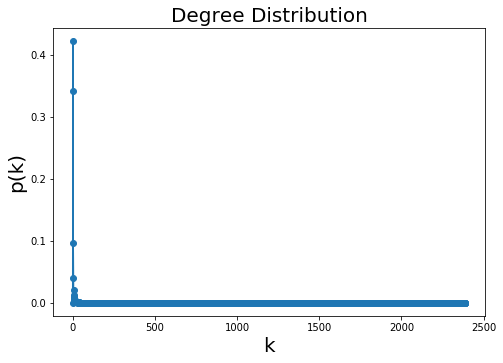

CPU times: user 191 ms, sys: 8.7 ms, total: 200 ms
Wall time: 203 ms


In [5]:
%%time

# Degree distribution plot.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(pk_df["k"], pk_df["pk"], "C0o-")

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution", fontsize=20)

plt.show()

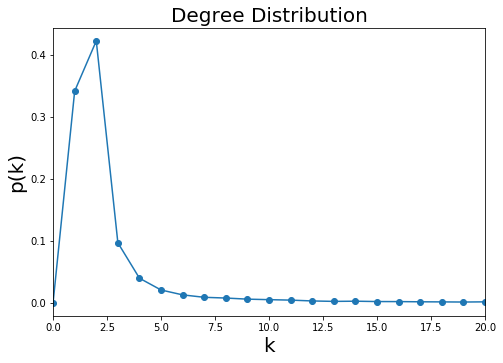

CPU times: user 208 ms, sys: 8.43 ms, total: 216 ms
Wall time: 225 ms


In [6]:
%%time

# Degree distribution plot until k=20.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(pk_df["k"], pk_df["pk"], "C0o-")

ax.set_xlim([0, 20])

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution", fontsize=20)

plt.show()

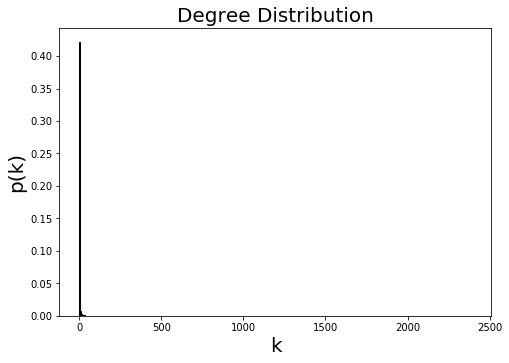

CPU times: user 5.67 s, sys: 56.8 ms, total: 5.72 s
Wall time: 5.77 s


In [7]:
%%time

# Degree distribution plot as a bar plot.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(pk_df["k"], pk_df["pk"],
       align="edge", width=1.0, edgecolor="k")

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution", fontsize=20)

plt.show()

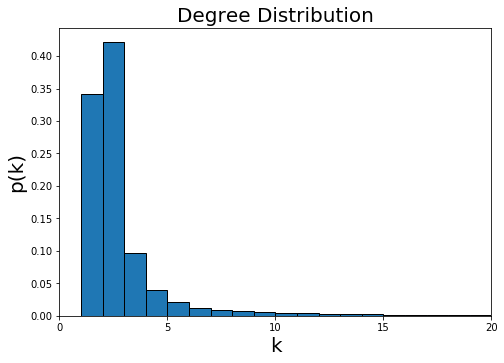

CPU times: user 5.24 s, sys: 36.3 ms, total: 5.28 s
Wall time: 5.3 s


In [8]:
%%time

# Degree distribution plot as a bar plot until k=20.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(pk_df["k"], pk_df["pk"],
       align="edge", width=1.0, edgecolor="k")

ax.set_xlim([0, 20])
ax.set_xticks(range(0, 21, 5))

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution", fontsize=20)

plt.show()

In [9]:
print (k_list[-1], pk_list[-1], N*pk_list[-1])
# This is the largest degree in the network.
# N*pk_list[k] = number of nodes with this degree.

2390 4.354831685755346e-05 1.0


In [10]:
# We found that k=2390 is the largest degree in the previous cell.
# We also found that 1 node has that degree.
# Here, we calculate the percentage of the network that that 1 node is connected to:
100*2390/N

10.408047728955276

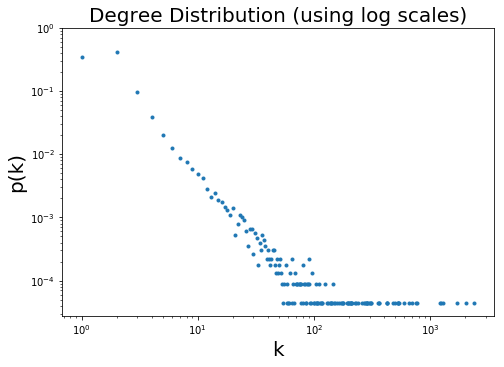

CPU times: user 1.04 s, sys: 19.5 ms, total: 1.06 s
Wall time: 1.1 s


In [11]:
%%time

# Degree distribution plot using log scales.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(pk_df["k"], pk_df["pk"], ".")
#        align="edge", width=1.0, edgecolor="k")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(top=1)

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution (using log scales)", fontsize=20)

plt.show()

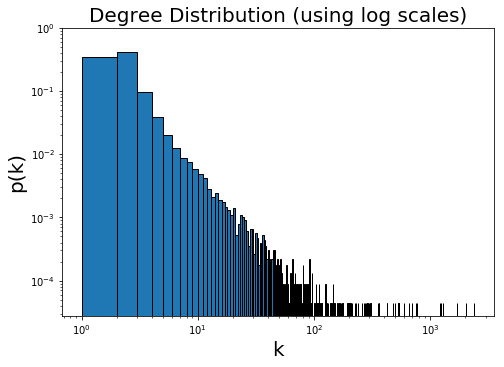

CPU times: user 7.66 s, sys: 54.5 ms, total: 7.72 s
Wall time: 7.83 s


In [12]:
%%time

# Degree distribution plot as a bar plot using log scales.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(pk_df["k"], pk_df["pk"],
       align="edge", width=1.0, edgecolor="k")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(top=1)

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution (using log scales)", fontsize=20)

plt.show()

In [13]:
# Make size of each bin = 5.

k_list_BinSize5 = [k for k in range(0, k_max+1, 5)]

AddSomeZeros = np.zeros(5, dtype=np.float)
cnt_list_temp = np.concatenate([cnt_list, AddSomeZeros])
cnt_list_BinSize5 = [sum(cnt_list_temp[k:k+5]) for k in k_list_BinSize5]

pk_list_BinSize5 = np.array(cnt_list_BinSize5)/(5.0 * N)

In [14]:
sum(pk_list_BinSize5)*5

1.0000000000000016

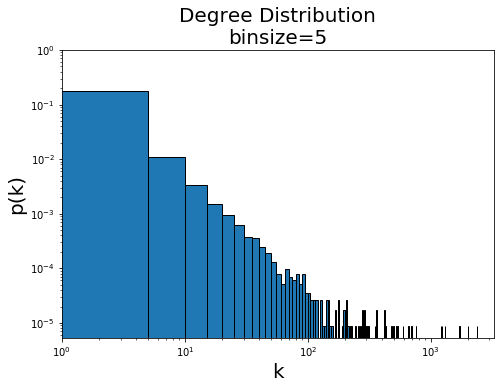

CPU times: user 2.25 s, sys: 27.2 ms, total: 2.28 s
Wall time: 2.3 s


In [15]:
%%time

# Deg distr as a bar plot using log scales; binsize=5.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(k_list_BinSize5, pk_list_BinSize5,
       align="edge", width=5.0, edgecolor="k")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(left=1)
ax.set_ylim(top=1)

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution\nbinsize=5", fontsize=20)

plt.show()

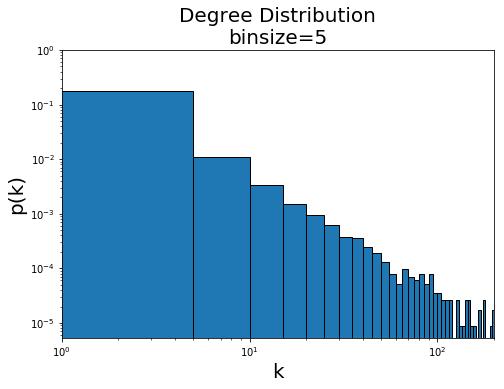

CPU times: user 2.21 s, sys: 21.7 ms, total: 2.23 s
Wall time: 2.26 s


In [16]:
%%time

# Deg distr as a bar plot using log scales until k=200; binsize=5.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(k_list_BinSize5, pk_list_BinSize5,
       align="edge", width=5.0, edgecolor="k")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(left=1)
ax.set_xlim(right=200)
ax.set_ylim(top=1)

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution\nbinsize=5", fontsize=20)

plt.show()

In [17]:
# Log binning:
k_list_LogBin = []
pk_list_LogBin_temp = []
k_BinSize = []
for n in range(1, 13): #I have counted how many bins I need while I do log binning here.
    kmin = 2**(n-1)
    kmax = 2**n
    k_list_LogBin.append(kmin)
    
    if kmax in pk_df.index:
        pk_sum = sum(pk_df.loc[range(kmin, kmax), 'cnt'].values)
    else:
        pk_sum = sum(pk_df.loc[kmin:, 'cnt'].values)
    
    pk_list_LogBin_temp.append( pk_sum )
    k_BinSize.append( kmax-kmin )

In [18]:
print (k_list_LogBin)
print (pk_list_LogBin_temp)
print (k_BinSize)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]
[7840, 11919, 1868, 727, 332, 145, 70, 28, 19, 9, 5, 1]
[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


In [19]:
print (len(k_list_LogBin))
print (len(pk_list_LogBin_temp))
print (len(k_BinSize))

12
12
12


In [20]:
pk_list_LogBin_temp = np.array(pk_list_LogBin_temp)
pk_list_LogBin = pk_list_LogBin_temp/k_BinSize
pk_list_LogBin = pk_list_LogBin/N

In [21]:
MySum = 0
for ii, pk in enumerate(pk_list_LogBin):
    MySum += pk*k_BinSize[ii]
print (MySum)

1.0000000000000002


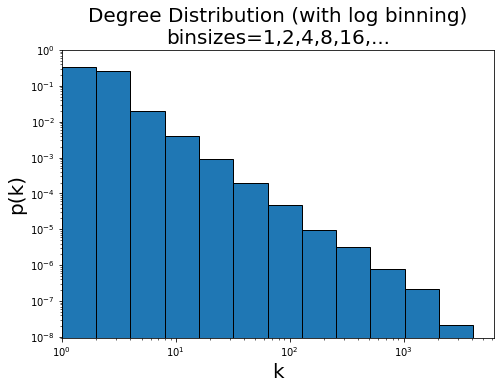

CPU times: user 903 ms, sys: 11.4 ms, total: 915 ms
Wall time: 917 ms


In [22]:
%%time

# Deg distr as a bar plot; using log scales; log binning with bin sizes=1,2,4,8,16,...
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(k_list_LogBin, pk_list_LogBin,
       align="edge", width=k_BinSize, edgecolor="k")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlim(left=1)
ax.set_ylim(top=1)

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("p(k)", fontsize=20)
ax.set_title("Degree Distribution (with log binning)\nbinsizes=1,2,4,8,16,...", fontsize=20)

plt.show()

In [23]:
# Cumulative distribution
Ck = np.zeros_like(pk_list)
for k in pk_df["k"].values:
    Ck[k] = sum(pk_df["cnt"][k:])/N

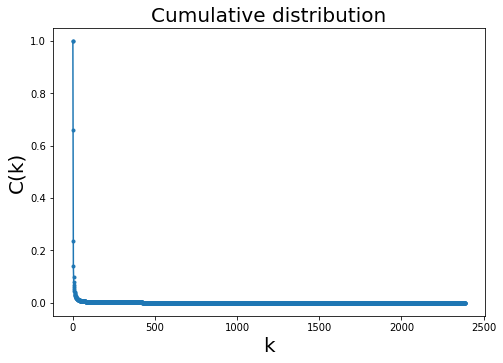

CPU times: user 148 ms, sys: 5.33 ms, total: 153 ms
Wall time: 151 ms


In [24]:
%%time

# Cumulative distr.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(pk_df["k"].values, Ck, ".-")

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("C(k)", fontsize=20)
ax.set_title("Cumulative distribution", fontsize=20)

plt.show()

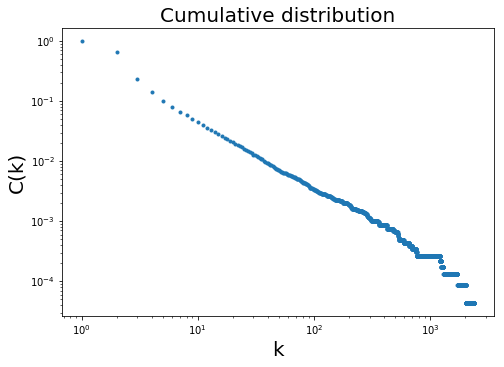

CPU times: user 714 ms, sys: 10.1 ms, total: 724 ms
Wall time: 726 ms


In [25]:
%%time

# Cumulative distr; using log scales.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(pk_df["k"].values, Ck, ".")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("C(k)", fontsize=20)
ax.set_title("Cumulative distribution", fontsize=20)

plt.show()

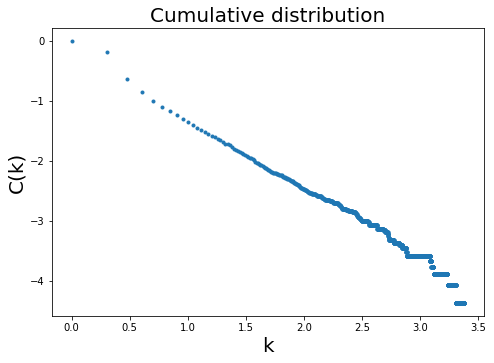

CPU times: user 164 ms, sys: 8.05 ms, total: 172 ms
Wall time: 171 ms


In [26]:
%%time

# Cumulative distr; using log scales.
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(np.log10(pk_df["k"].values[1:]), np.log10(Ck[1:]), ".")

ax.set_xlabel("k", fontsize=20)
ax.set_ylabel("C(k)", fontsize=20)
ax.set_title("Cumulative distribution", fontsize=20)

plt.show()